In [18]:
import os
import numpy as np
import cv2 as cv
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
from PIL import Image

def resize_image(image_path, output_size, image_name):
    image = Image.open(image_path)
    width, height = image.size
    max_dim = max(width, height)
    scale = output_size / max_dim
    new_width = int(width * scale)
    new_height = int(height * scale)
    resized_image = image.resize((new_width, new_height))
    output_image = Image.new('RGB', (output_size, output_size), 'black')
    x = (output_size - new_width) // 2
    y = (output_size - new_height) // 2


    output_image.paste(resized_image, (x, y))
    output_image.save(image_name)


In [20]:
data = pd.read_csv('./dataset.csv', names=['path', 'class'])
data

,path,class
0,/Users/avdhantyagi/DISK/notebook/Dataset/Land/...,Land
1,/Users/avdhantyagi/DISK/notebook/Dataset/Land/...,Land
2,/Users/avdhantyagi/DISK/notebook/Dataset/Land/...,Land
3,/Users/avdhantyagi/DISK/notebook/Dataset/Land/...,Land
4,/Users/avdhantyagi/DISK/notebook/Dataset/Land/...,Land
...,...,...
28209,/Users/avdhantyagi/DISK/notebook/Dataset/Land-...,Land-small
28210,/Users/avdhantyagi/DISK/notebook/Dataset/Land-...,Land-small
28211,/Users/avdhantyagi/DISK/notebook/Dataset/Land-...,Land-small
28212,/Users/avdhantyagi/DISK/notebook/Dataset/Land-...,Land-small


In [21]:
index_for_classes = pd.read_csv('index_for_classes.csv')

In [22]:
index_for_classes

,class,id
0,Land,0
1,Buildings,2340
2,Tools,2662
3,Store event,4107
4,Snails and shells,4319
5,Clo-occ,4413
6,Bath Baby,5749
7,Auto,6099
8,Flowers,7653
9,Prints,7723


In [58]:
while(1):
    path = input("Enter Valid Image path: ")
    if(os.path.exists(path) == False) :
        continue
    break

resize_image(path, 32, "./A.jpg")
path = "./A.jpg"
image = cv.Canny(cv.imread(path),100,300)
cv.imwrite(path,image)
resize_image(path, 256, path)

In [59]:
classes = ['Land', 'Buildings', 'Tools', 'Store event', 'Clo-occ', 'Bath Baby', 'Auto', 'Flowers', 'Prints', 'Reptiles', 'Nature', 'Daily', 'Sports', 'Utilities', 'Instruments', 'Architecture', 'Signs', 'Vegetation', 'Food', 'Insects', 'Birds', 'SnailsShells', 'Sea', 'Fish', 'Land-small', 'RandomObjects']
while(1):
    
    ui_class = input('enter class name : ')
    if ui_class not in classes:
        print("enter one of these 'Land', 'Buildings', 'Tools', 'Store event', 'Clo-occ', 'Bath Baby', 'Auto', 'Flowers', 'Prints', 'Reptiles', 'Nature', 'Daily', 'Sports', 'Utilities', 'Instruments', 'Architecture', 'Signs', 'Vegetation', 'Food', 'Insects', 'Birds', 'SnailsShells', 'Sea', 'Fish', 'Land-small', 'RandomObjects'")
        continue
    break
start = 0
end = 0
for i in range(len(index_for_classes['class'])):
    if(ui_class == index_for_classes['class'][i]):
        start = index_for_classes['id'][i]
        end = index_for_classes['id'][i+1]

print(start, end)

6099 7653


1554

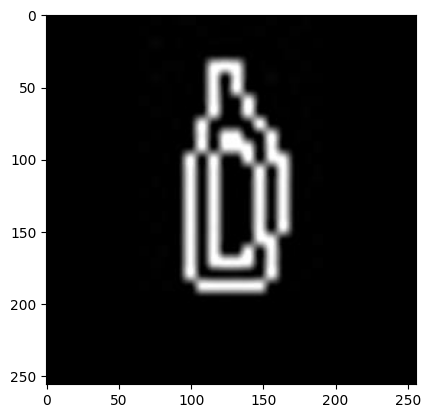

In [69]:
from skimage.metrics import structural_similarity
import numpy as np

u_img = cv.imread(path)
# u_img = cv.Canny(u_img,200,350)
# resize_image(path, 32, path)
# u_img = cv.imread(path)

plt.imshow(u_img)

ssimarr = []
u_img = cv.cvtColor(u_img, cv.COLOR_BGR2GRAY)
for i in range(start,end):
    ximg = cv.imread(data['path'][i])
    ximg = cv.cvtColor(ximg, cv.COLOR_BGR2GRAY)
    ximg = cv.Canny(ximg,150,400)
    (score, diff) = structural_similarity(u_img, ximg, full=True)
    ssimarr.append([score,data['path'][i]])

len(ssimarr)


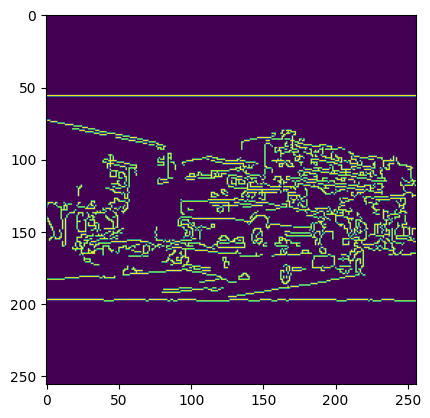

In [70]:
plt.imshow(ximg)

In [71]:
import operator
ssimarr = sorted(ssimarr, key=operator.itemgetter(0))

[0.2719130646816858, '/Users/avdhantyagi/DISK/notebook/Dataset/Auto/n02835271_3342.JPEG']
[0.2780135981692001, '/Users/avdhantyagi/DISK/notebook/Dataset/Auto/n04146614_10568.JPEG']
[0.28385004616749315, '/Users/avdhantyagi/DISK/notebook/Dataset/Auto/n02860847_32084.JPEG']
[0.3042402952292902, '/Users/avdhantyagi/DISK/notebook/Dataset/Auto/n04310018_39.JPEG']
[0.3061189696834752, '/Users/avdhantyagi/DISK/notebook/Dataset/Auto/n04483307_9377.JPEG']
[0.3074811781069395, '/Users/avdhantyagi/DISK/notebook/Dataset/Auto/n03216828_35320.JPEG']
[0.3080462930048028, '/Users/avdhantyagi/DISK/notebook/Dataset/Auto/n04428191_28275.JPEG']
[0.30894189192316823, '/Users/avdhantyagi/DISK/notebook/Dataset/Auto/n03272562_11940.JPEG']
[0.30951318119045873, '/Users/avdhantyagi/DISK/notebook/Dataset/Auto/n02835271_17280.JPEG']
[0.31407563841383307, '/Users/avdhantyagi/DISK/notebook/Dataset/Auto/n04310018_2678.JPEG']
[0.3185557233965268, '/Users/avdhantyagi/DISK/notebook/Dataset/Auto/n02835271_1453.JPEG']
[0

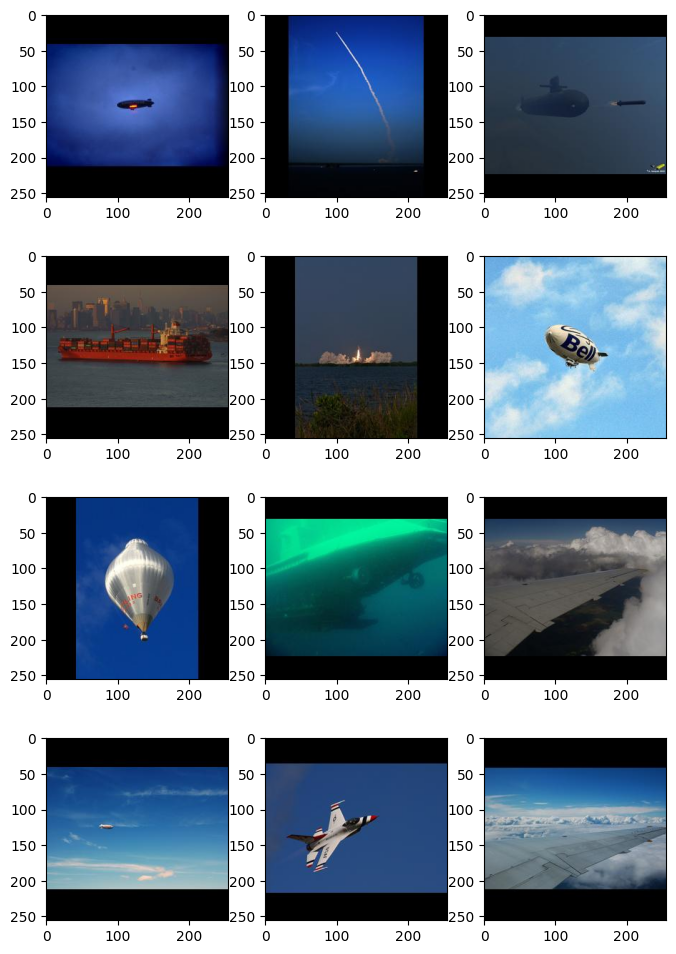

In [72]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8, 12))
rows = 4
columns = 3
for i in range(1,rows*columns+1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(cv.cvtColor(cv.imread(ssimarr[-i][1]), cv.COLOR_BGR2RGB))
    print(ssimarr[i])
plt.show()

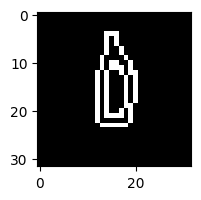

In [73]:
fig = plt.figure(figsize=(3, 2))
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))